In [2]:
import os

import numpy as np
import pandas as pd

import zipfile

from scipy import stats
from matplotlib import pyplot

In [22]:
class PhraseList:
    
    def __init__(self, phrases: list):

        self.phrases = phrases
        self.phrase_mp = {p: i for i, p in enumerate(phrases)}
        
    def prompt_to_phrase_indices(self, prompt: str):
        return list(map(self.phrase_mp.get, prompt.split(', ')))

# load phrase scores

In [17]:
f = zipfile.ZipFile('./tmp/2023-12-04-phrase-scores-probability-environmental.zip')
phrases = pd.read_csv(f.open('2023-12-04-phrase-scores-probability-05-environmental-positive.csv'), index_col='index')

phrases

,phrase,occurrences,token length,boltzman_temperature,boltzman k,score,boltzman probability,normalized probability,unsmooth cumulative probability,normalized with epsilon,smooth cumulative probability
index,,,,,,,,,,,
0,environmental D,28941,3,0.5,1.0,-6.028159,5.807746e-06,-246.431058,-9.357335e+07,2.580879e-06,0.020006
1,D side scrolling,37016,3,0.5,1.0,72.349869,6.955010e+62,-89.675002,-2.653694e+02,9.391688e-07,0.999998
2,D side scrolling video game,39924,5,0.5,1.0,72.319138,6.540412e+62,-89.736464,-3.551058e+02,9.398125e-07,0.999997
3,video game,47624,2,0.5,1.0,2.277691,9.514309e+01,-229.819358,-7.369090e+06,2.406905e-06,0.922826
4,D environmental,30753,2,0.5,1.0,49.366970,7.578885e+42,-135.640800,-7.563040e+02,1.420570e-06,0.999993
...,...,...,...,...,...,...,...,...,...,...,...
409024,walking in a passageway in london,1,8,0.5,1.0,0.161925,1.382440e+00,-234.050890,-7.045226e+07,2.451222e-06,0.262154
409025,defraction spikes,1,3,0.5,1.0,0.243441,1.627235e+00,-233.887858,-6.453938e+07,2.449514e-06,0.324080
409026,dressed in a scholars robe,1,6,0.5,1.0,0.175111,1.419383e+00,-234.024518,-6.948990e+07,2.450945e-06,0.272233


# load prompts

In [18]:
f = zipfile.ZipFile('./tmp/2023-12-04-independent-approx-v1-environmental.zip')
prompts = pd.read_csv(f.open('2023-12-04-independent-approx-v1-00-environmental.csv'))

prompts

,job_uuid,positive_prompt,negative_prompt,boltzman temperature,boltzman k
0,-1,"D environmental side scrolling, virtualgirlaim...","subject close to camera, badpicturechillvbadpi...",0.5,1.0
1,-1,"with a positive perspective, subterranean anth...","steel, merging fingers, ripped fabric, holding...",0.5,1.0
2,-1,"by sparth, D environmental side scrolling, str...","small lips, cron, lipstick, bad breasthole, br...",0.5,1.0
3,-1,"D environmental side scrolling, sketch with wa...","chunie name, ngtv, *photo rgb backlighting, cu...",0.5,1.0
4,-1,"hidden amidst the foliage, D environmental sid...","mismatched clothes, lipstick, worst thigh, mes...",0.5,1.0
...,...,...,...,...,...
1019,-1,"huff, a navigation bar below the cover photo, ...","splash of water, three nipples, beach mat, wor...",0.5,1.0
1020,-1,"lots of smoke, and dark shadowy colors can be ...","ftriff** image # white background v q s , busy...",0.5,1.0
1021,-1,"the enchanting deity of the vanir, D environme...","lipstick, bad surrealism art, lowered, dirtyte...",0.5,1.0
1022,-1,"maximum rendering detail, haunted houses, D en...","hairflower, feathers, glitchloop, deformed eye...",0.5,1.0


# analysis

In [24]:
pharse_list = PhraseList(phrases=list(phrases['phrase']))

## case study

In [20]:
prompt = prompts['positive_prompt'][0]
prompt

'D environmental side scrolling, virtualgirlaim, dark sister, best quarity, essential oil, reminiscent of a tarot card, deep shadows and bright highlights, elizabeth olsenanne hathawayselena gomez, clowns stood in a room full of clown puppets, gnomes, and a serene vibe'

In [25]:
phrase_indices = pharse_list.prompt_to_phrase_indices(prompt)
phrase_indices

[7,
 340961,
 129727,
 349312,
 341892,
 211390,
 240842,
 392014,
 208983,
 59624,
 301447]

In [26]:
score_sum = phrases.loc[phrase_indices, 'score'].sum()
score_sum

117.19532899999999

## distribution

In [27]:
phrase_indices_s = list(map(pharse_list.prompt_to_phrase_indices, prompts['positive_prompt']))

In [30]:
score_sums = [phrases.loc[phrase_indices, 'score'].sum() for phrase_indices in phrase_indices_s]

Text(0.5, 1.0, 'phrase score sum distribution')

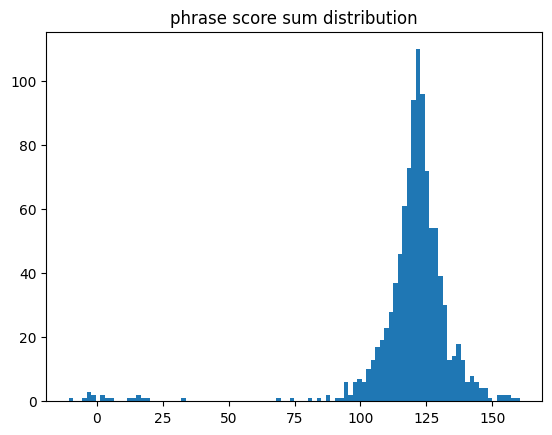

In [32]:
_ = pyplot.hist(score_sums, bins=100)
pyplot.title('phrase score sum distribution')